In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Loading the IBM Base Sample Data of Telco Customer Churn
data= pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype(object)
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [8]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
data.dropna(how = 'any', inplace = True)

In [10]:
data.drop(axis=1, columns= 'customerID', inplace=True)

In [11]:
print(data[data.Churn == 'No']['Churn'].value_counts() *100/ len(data))
print(data[data.Churn == 'Yes']['Churn'].value_counts() *100/ len(data))

No    73.421502
Name: Churn, dtype: float64
Yes    26.578498
Name: Churn, dtype: float64


In [12]:
data[data.tenure<0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [13]:
data[data.MonthlyCharges<0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [14]:
data[data.TotalCharges<0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


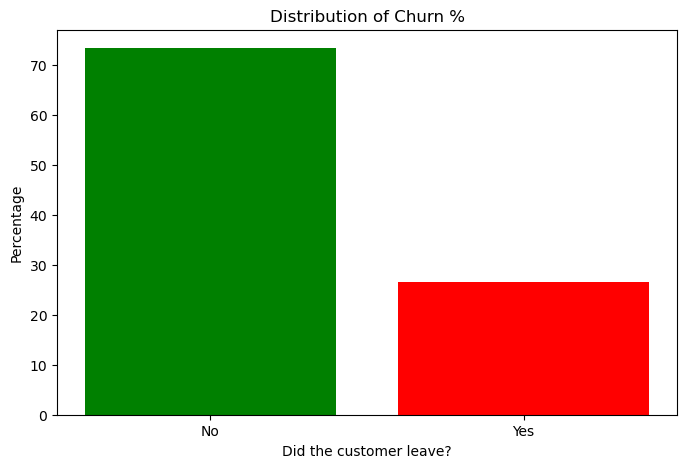

In [15]:
fig, axes = plt.subplots(figsize=(8,5))
df = data["Churn"].value_counts(normalize=True)
axes.bar(df.index, df*100, color=['green', 'red'])
axes.set_title('Distribution of Churn %')
axes.set_ylabel('Percentage')
axes.set_xlabel('Did the customer leave?')
plt.show()

**Observations:**
> Data is imbalanced, for predicting customer churn we need to resample our data, close to 30% customers churned, while the rest remained with the service provider.

In [16]:
# Create column ChurnVal with - Yes = 1 and No = 0
churn_mapping = {"No": 0, "Yes": 1}
data['ChurnVal'] = data['Churn'].map(churn_mapping)

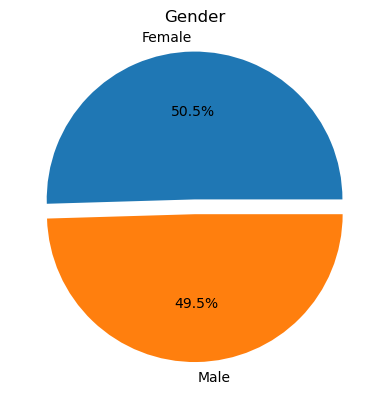

In [17]:
plt.pie(data.gender.value_counts(), labels=["Female", "Male"] ,autopct= '%1.1f%%', explode= (0.1,0))
plt.title("Gender")
plt.show()

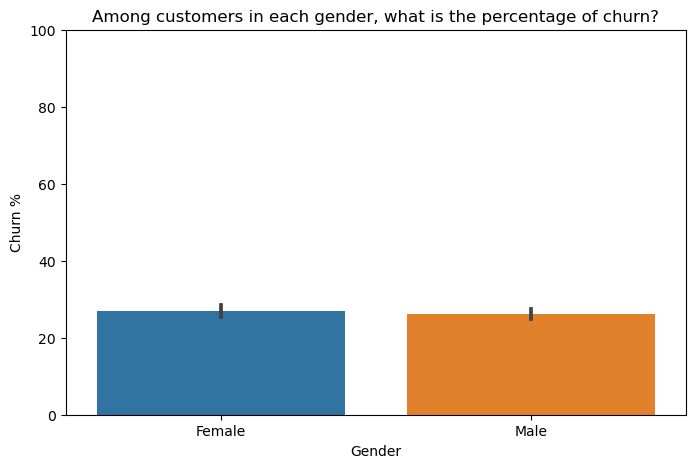

In [18]:
fig, ax = plt.subplots(figsize=(8,5))
# Chances of churn based on gender
sns.barplot(x="gender", y=data["ChurnVal"]*100, data=data, ax=ax)
ax.set_xlabel('Gender')
ax.set_ylabel('Churn %')
ax.set_title('Among customers in each gender, what is the percentage of churn?')
ax.set_ylim(0,100)
plt.show()

**Observations:**
* The dataset has almost equal distribution of male and female customers.
* Both in the churned or retained category - percentage of males and females are almost equally distributed.
* Out of all male customers, approx 26% churned. While among females, the churn percentage is approx 27%. Both are almost at equal level.
* It can be concluded that probability of churn does not depend on gender of the customer.

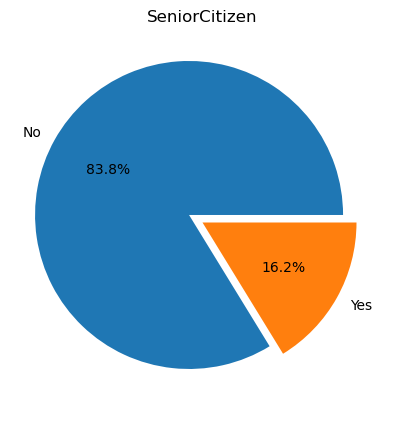

In [19]:
fig = plt.subplots(figsize = (5,5))
plt.pie(data.SeniorCitizen.value_counts(), labels=["No", "Yes"] ,autopct= '%1.1f%%', explode= (0.1,0))
plt.title("SeniorCitizen")
plt.show()

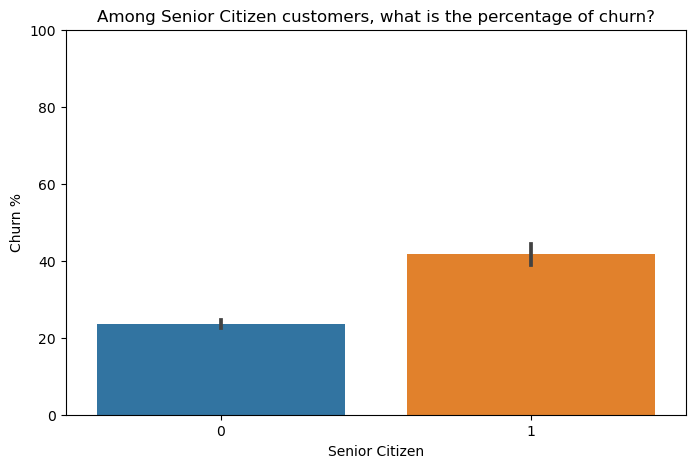

In [20]:
fig, ax = plt.subplots(figsize=(8,5))
# Chances of churn based on gender
sns.barplot(x="SeniorCitizen", y=data["ChurnVal"]*100, data=data, ax=ax)
ax.set_xlabel('Senior Citizen')
ax.set_ylabel('Churn %')
ax.set_title('Among Senior Citizen customers, what is the percentage of churn?')
ax.set_ylim(0,100)
plt.show()

**Observations:**
* Majority of the customers in dataset are Non-Senior Citizens (> 80%).
* Out of all senior citizen customers, more than 40% churned. While among younder customers, the churn percentage is less than 25%.
* Hence, senior citizens tend to churn more than younger customers.
* Thus, SeniorCitizen and Churn features seem to be related.

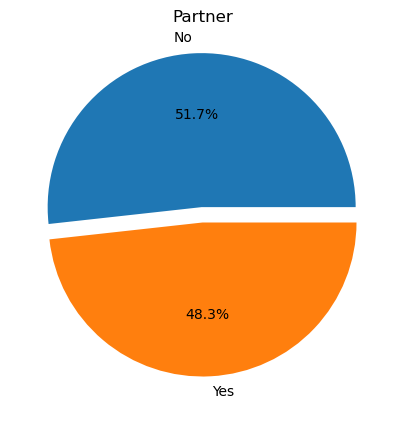

In [21]:
fig = plt.subplots(figsize = (5,5))
plt.pie(data.Partner.value_counts(), labels=["No", "Yes"] ,autopct= '%1.1f%%', explode= (0.1,0))
plt.title("Partner")
plt.show()

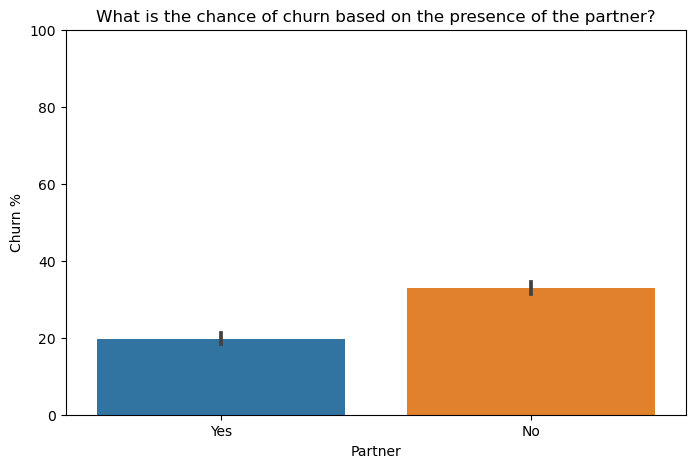

In [22]:
fig, ax = plt.subplots(figsize=(8,5))
# Chances of churn based on gender
sns.barplot(x="Partner", y=data["ChurnVal"]*100, data=data, ax=ax)
ax.set_xlabel('Partner')
ax.set_ylabel('Churn %')
ax.set_title('What is the chance of churn based on the presence of the partner?')
ax.set_ylim(0,100)
plt.show()

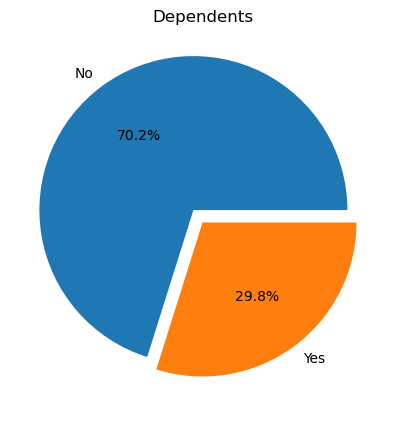

In [24]:
fig = plt.subplots(figsize = (5,5))
plt.pie(data.Dependents.value_counts(), labels=["No", "Yes"] ,autopct= '%1.1f%%', explode= (0.1,0))
plt.title("Dependents")
plt.show()

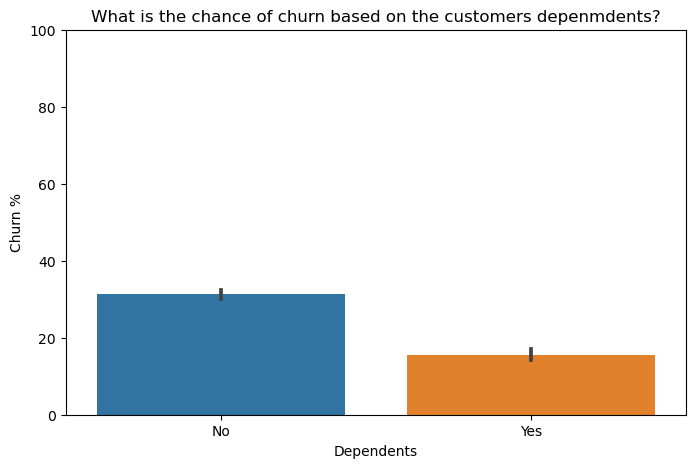

In [23]:
fig, ax = plt.subplots(figsize=(8,5))
# Chances of churn based on gender
sns.barplot(x="Dependents", y=data["ChurnVal"]*100, data=data, ax=ax)
ax.set_xlabel('Dependents')
ax.set_ylabel('Churn %')
ax.set_title('What is the chance of churn based on the customers depenmdents?')
ax.set_ylim(0,100)
plt.show()

**Observations:**
* The dataset contains almost equal distribution of customer data - either living alone or with partner.
* Customers living alone tend to churn more (~35% vs ~20%).
* The dataset contains almost 70% customers who does not have a dependent, while 30% has one or more dependents.
* Customers without depedents tend to churn more (~30% vs ~20%).
* From Partner and Dependents data we can conclude that - customers who are single/independent, i.e. without partners or dependents tend to leave the Service Provider more, while customers with partner and/or dependents, usually continue with the same Service Provider.

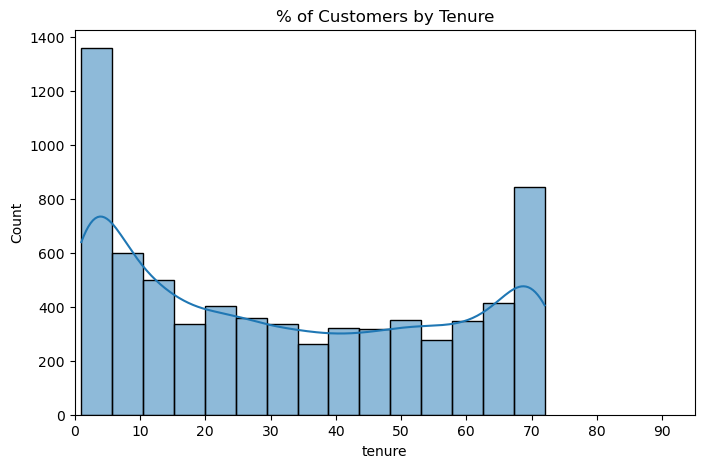

In [25]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data.tenure, kde=True)
ax.set_title('% of Customers by Tenure')
ax.set_xticks(np.arange(0, 100, 10))
ax.set_xlim(0,95)
plt.show()

**Observations:**
* Majority of the customers in the dataset are rather short-lived (less than a year). So, either people churn within a year, or these are newly acquired customers.
* Interestingly, there's a spike of number in number for customers who've been with the Company for more than 5 years.
* From the other diagram as well we observe that the churn rate is bit thinner for very long tenure customers.

In [28]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1 yr', '2 yr', '3 yr', '4 yr', '5 yr', '6 yr']
data['tenureGroup'] = pd.cut(data["tenure"], bins, labels=labels)

In [29]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnVal,tenureGroup
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1 yr
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0,3 yr
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,1 yr
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,4 yr
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,1 yr


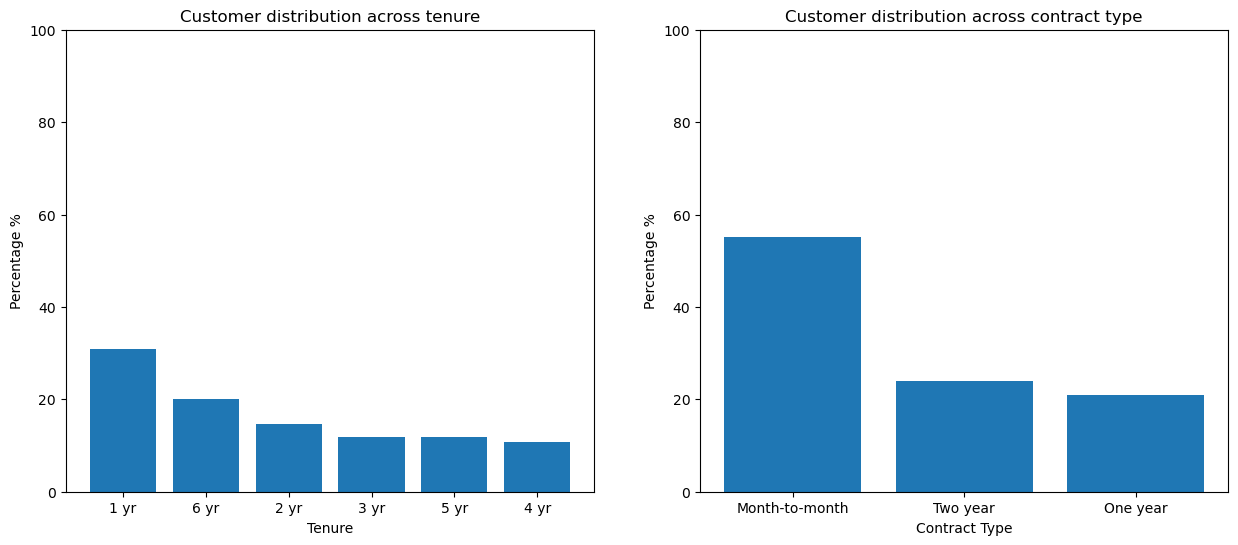

In [30]:
# Draw a bar plot of tenure vs churn
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

df1 = data["tenureGroup"].value_counts(normalize=True)
axes1.bar(df1.index, df1*100)
axes1.set_xlabel('Tenure')
axes1.set_ylabel('Percentage %')
axes1.set_ylim(0,100)
axes1.set_title('Customer distribution across tenure')


df2 = data["Contract"].value_counts(normalize=True)
axes2.bar(df2.index, df2*100)
axes2.set_xlabel('Contract Type')
axes2.set_ylabel('Percentage %')
axes2.set_ylim(0,100)
axes2.set_title('Customer distribution across contract type')

plt.show()

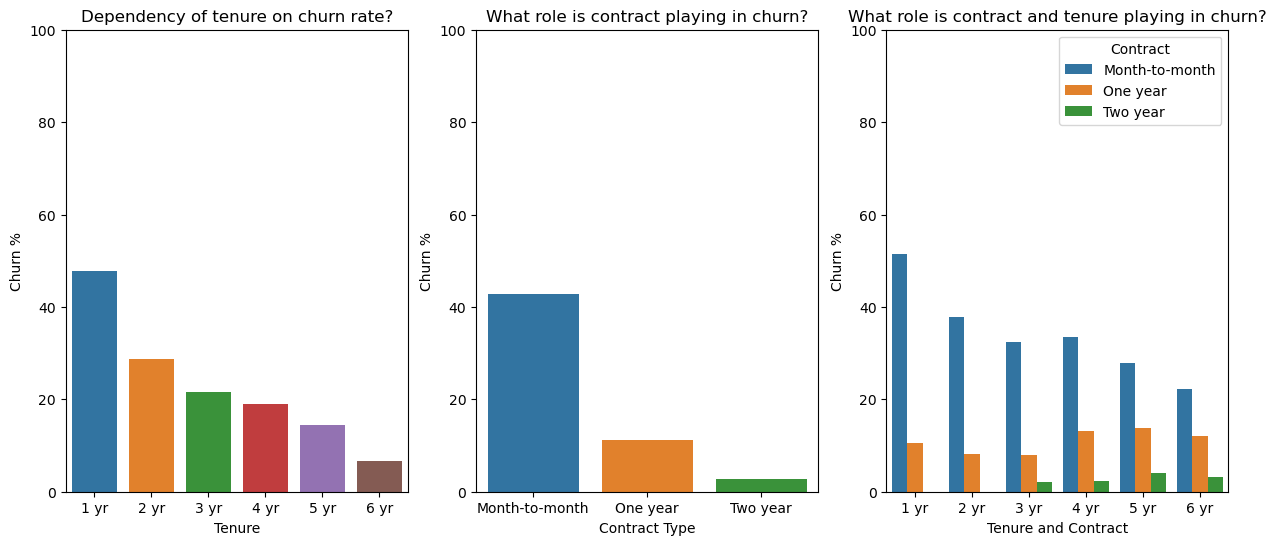

In [31]:
# Draw a bar plot of tenure vs churn
fig, [axes1, axes2, axes3] = plt.subplots(1,3,figsize=(15,6))
sns.barplot(x="tenureGroup", y=data.ChurnVal*100, data=data, errorbar=None, ax=axes1)
axes1.set_xlabel('Tenure')
axes1.set_ylabel('Churn %')
axes1.set_ylim(0,100)
axes1.set_title('Dependency of tenure on churn rate?')

sns.barplot(x="Contract", y=data.ChurnVal*100, data=data, errorbar=None, ax=axes2)
axes2.set_xlabel('Contract Type')
axes2.set_ylabel('Churn %')
axes2.set_ylim(0,100)
axes2.set_title('What role is contract playing in churn?')

# Draw a bar plot of tenure vs churn vs contract
sns.barplot(x="tenureGroup", y=data.ChurnVal*100, hue="Contract", data=data, errorbar=None, ax=axes3)
axes3.set_xlabel('Tenure and Contract')
axes3.set_ylabel('Churn %')
axes3.set_ylim(0,100)
axes3.set_title('What role is contract and tenure playing in churn?')

plt.show()

**Observations:**
* We divided the customer tenure into categories as - 1 year, 2 years to 6 years. It is apparent that newly acquired customers tend to churn more (~almost 50% of customers who have subscribed within last 1 years have left).
* As customer tenure increases, the chance of churn decreases accordingly.
* Hence, the Company should concentrate on retaining newly acquired customers. If they can somehow hold the customers for more couple of years, the possibility of those customers continuing with the same Company increases multifold.
* In addition, the Company should try to get customers on contract for longer duration instead of selling monthly plans. This is another important factor for churn determination.
* ~55% customer are on month-to-month (or monthly) plans, while little more than 20% each are on 1 or 2 years contract.
* The churn rate is high among monthly customers and least among 2-year contracted customers. While this is expected because of the contract duration, this is an alarming signal for the Company. It should try to retain contracted customers and bring the churn rate to near zero, in addition to spending effort on month-to-month customers.

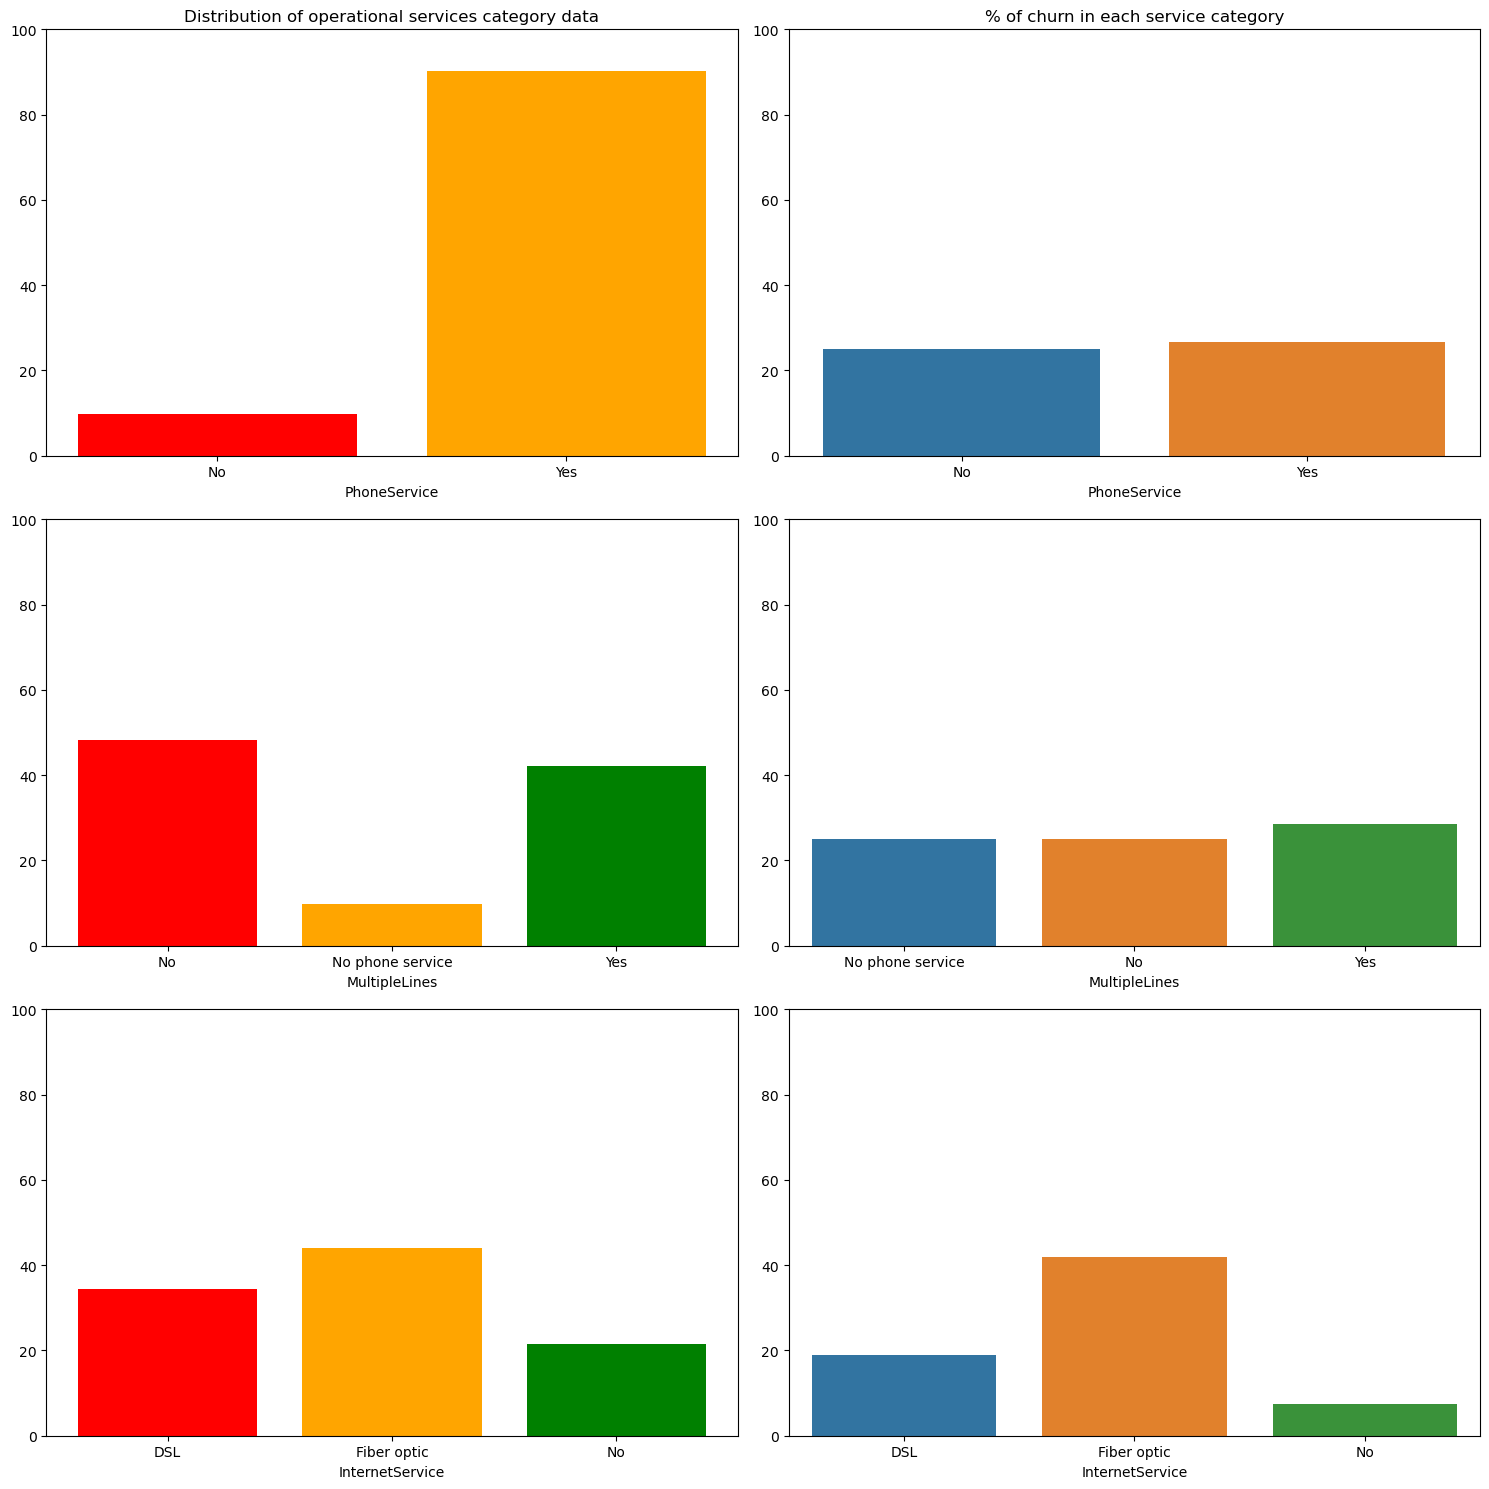

In [32]:
Services = ['PhoneService', 'MultipleLines', 'InternetService']
n_cols = 2
n_rows = len(Services)
fig = plt.figure(figsize=(15,15))
#fig.suptitle('Distribution of Service Types and relation with Churn')
idx = 0

for serviceType in enumerate(Services):
    # Fetch data of Service Type
    df = data[serviceType[1]].value_counts(normalize=True).sort_index()

    # Now, plot the data
    i = 0
    for i in range(n_cols):
        idx+=1
        axes = fig.add_subplot(n_rows, n_cols, idx)

        # On column 1 - Plot the data distribution on bar plot
        if idx%2 != 0:
            axes.bar(df.index, df*100, color=['red', 'orange', 'green'])
        # On column 2 - Plot the percentage of churns on each service type
        else:
            sns.barplot(x=serviceType[1], y=data.ChurnVal*100, data=data, errorbar=None, ax=axes)

        if idx == 1 : axes.set_title('Distribution of operational services category data')
        if idx == 2 : axes.set_title('% of churn in each service category')
            
        axes.set_xlabel(serviceType[1])
        axes.set_ylabel('')
        axes.set_ylim(0,100)

fig.tight_layout()
plt.show()

**Observations:**
* Phone Service - Almost all (90%) customers have Phone Service. However, the churn rate is very low compared to the volume (25%). On the other hand, churn rate is almost same (25%) among non-phone service customers as well (though they form only 10% of the population). Thus, selling Phone Service is more beneficial for the Service Provider.
* Multiple Lines - Among Phone Service users, 45% has Multiple Lines while the rest 45% have single line. Churn rate is slightly higher among users with multiple lines, but not that significant (~28%).
* Internet Service - Approx 20% customers do not use internet. Among customers using internet, approx 45% use Fiber Optic and 35% use DSL. However, churn among Fiber Optic users is pretty high as well (> 40%), while it is 20% among DSL users. Hence, Company needs to look into the quality of its internet service since more churning is observed for high speed internet connections.

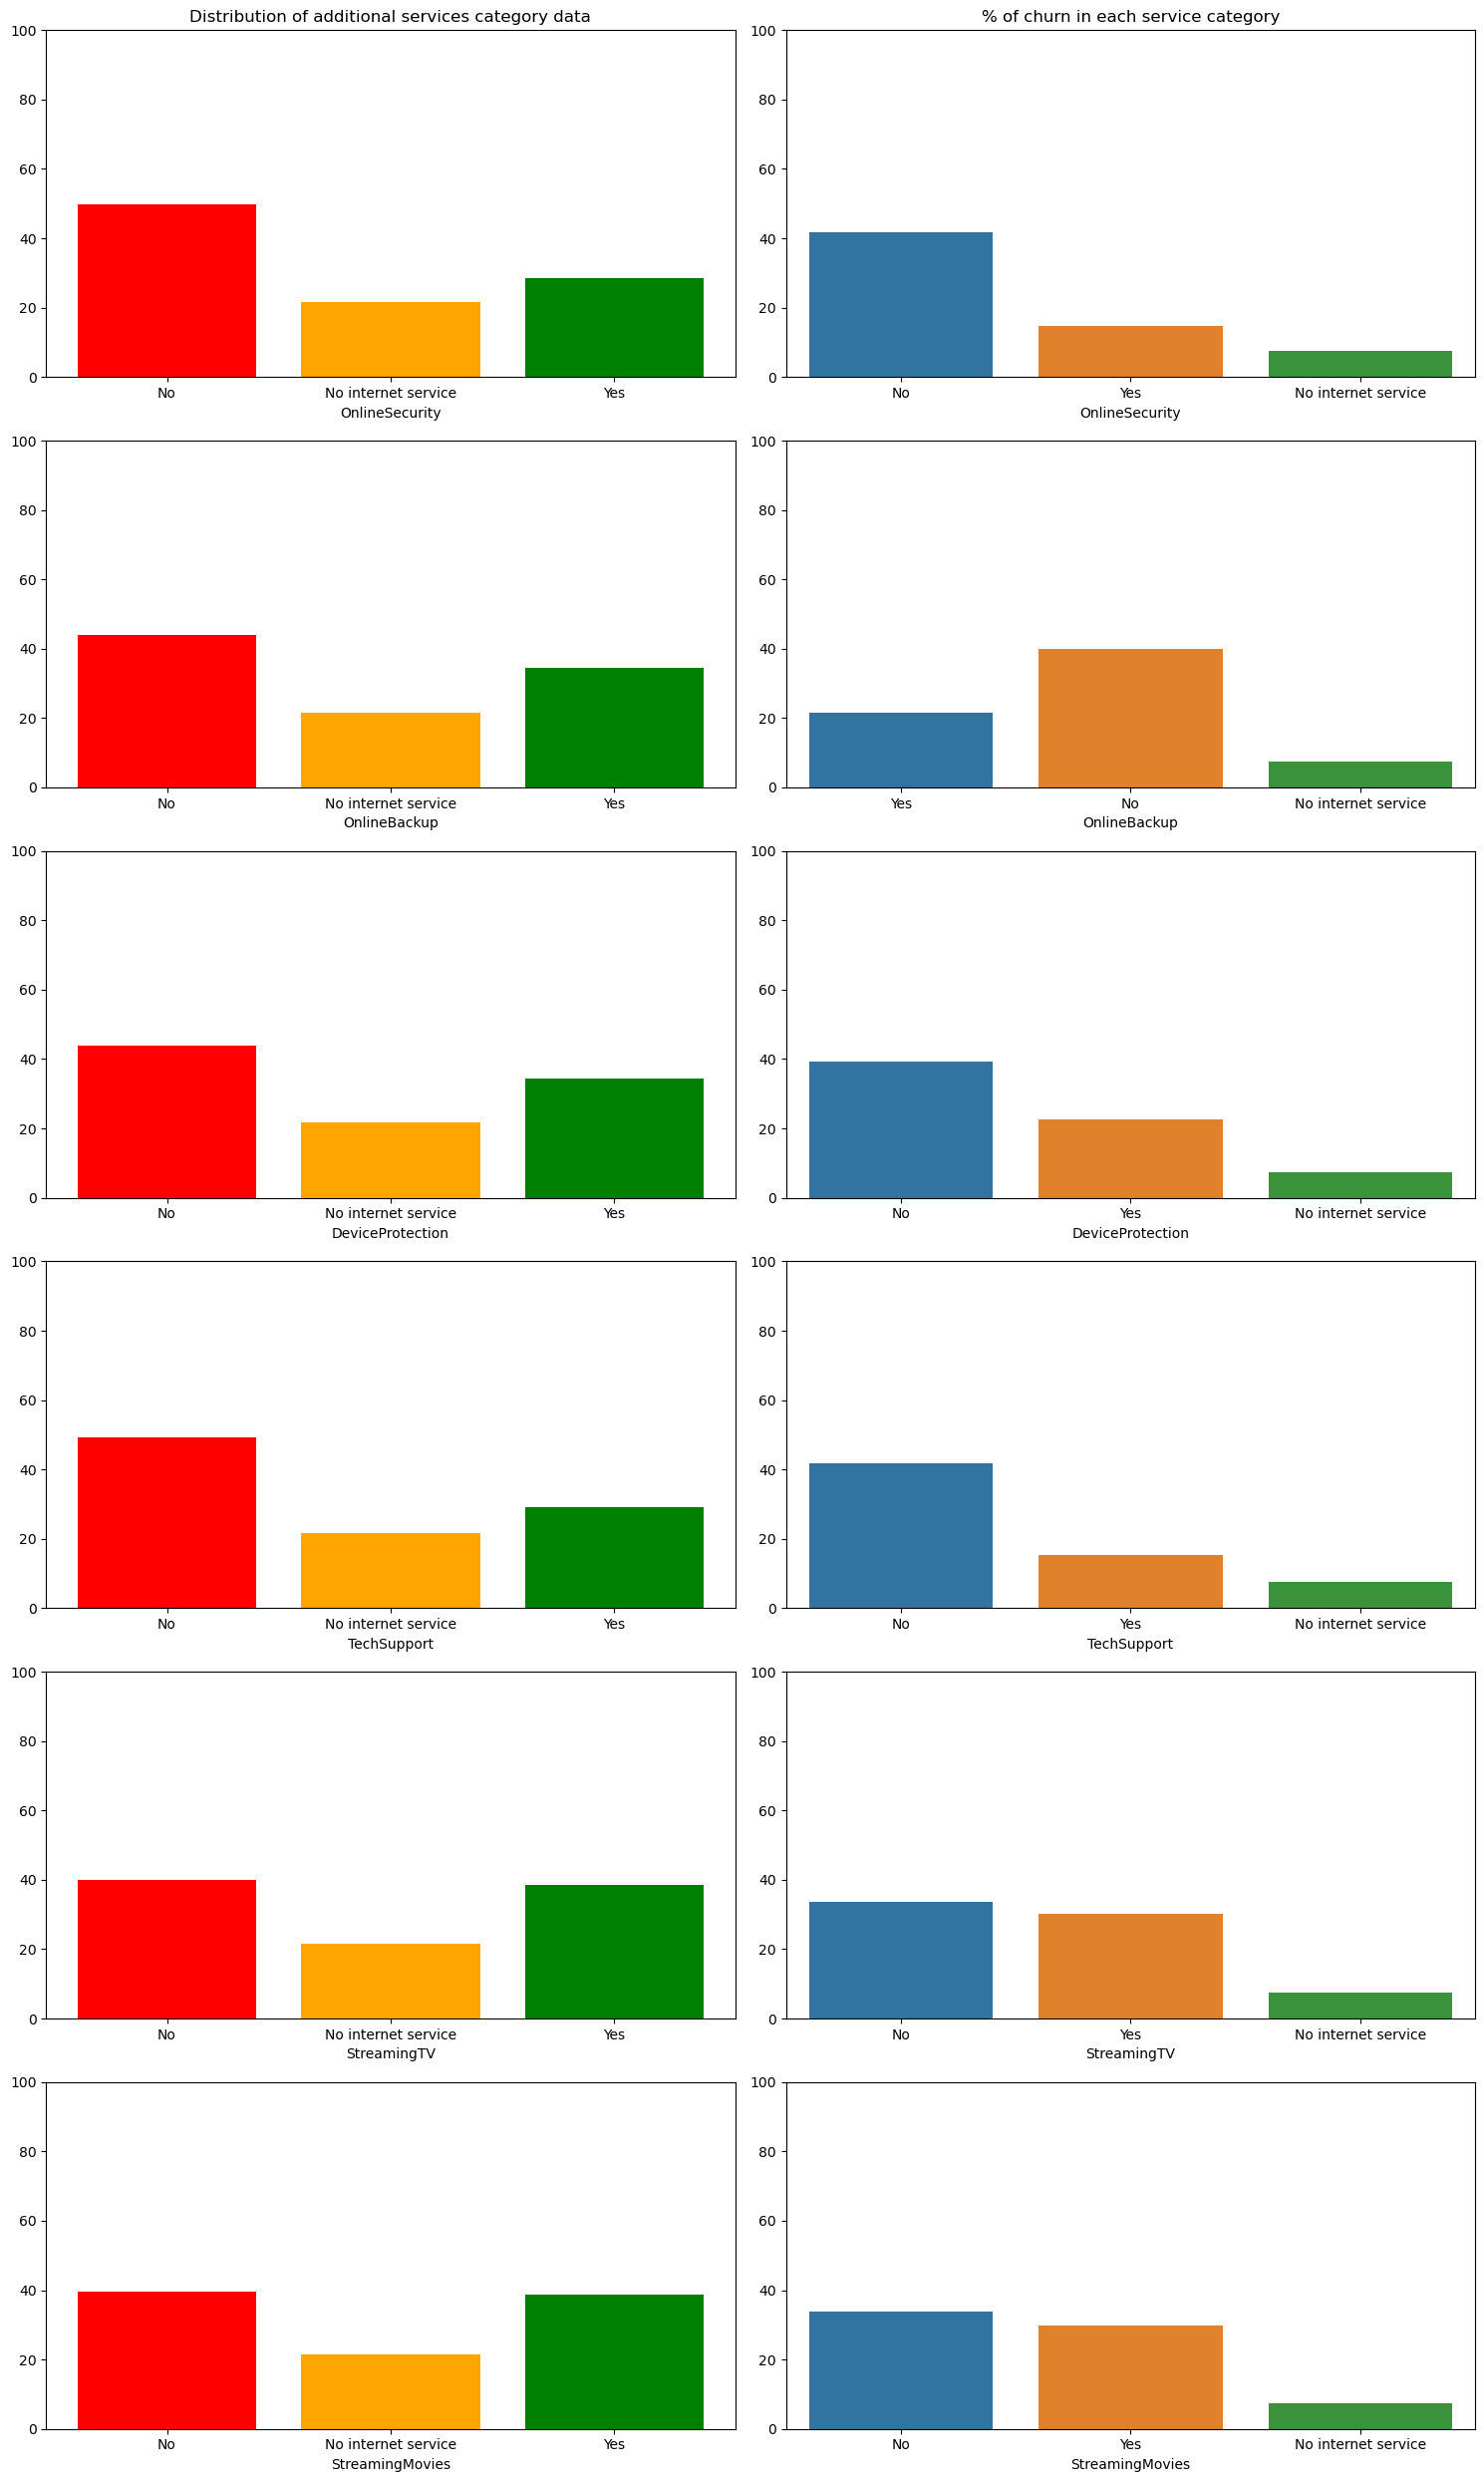

In [33]:
Add_Services = ['OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
n_cols = 2
n_rows = len(Add_Services)
fig = plt.figure(figsize=(15,25))
#fig.suptitle('Distribution of Service Types and relation with Churn')
idx = 0

for serviceType in enumerate(Add_Services):
    # Fetch data of Service Type
    df = data[serviceType[1]].value_counts(normalize=True).sort_index()

    # Now, plot the data
    i = 0
    for i in range(n_cols):
        idx+=1
        axes = fig.add_subplot(n_rows, n_cols, idx)

        # On column 1 - Plot the data distribution on bar plot
        if idx%2 != 0:
            axes.bar(df.index, df*100, color=['red', 'orange', 'green'])
        # On column 2 - Plot the percentage of churns on each service type
        else:
            sns.barplot(x=serviceType[1], y=data.ChurnVal*100, data=data, errorbar=None, ax=axes)

        if idx == 1 : axes.set_title('Distribution of additional services category data')
        if idx == 2 : axes.set_title('% of churn in each service category')
            
        axes.set_xlabel(serviceType[1])
        axes.set_ylabel('')
        axes.set_ylim(0,100)

fig.tight_layout()
plt.show()

**Observations:**
* Online Security - ~50% customers do not use online security service, and churn rate among such users is highest as well (40%).
* Online Backup, Device Protection and Tech Support - Same as above, most of the customers do not use this service and they tend to churn as well.
* Streaming TV and Streaming Movies - Among users with internet services (which is mandatory for availing these services), almost half use these streaming services. The rate of churn is more or less same as well (~35%) irrespective of usage of streaming services.

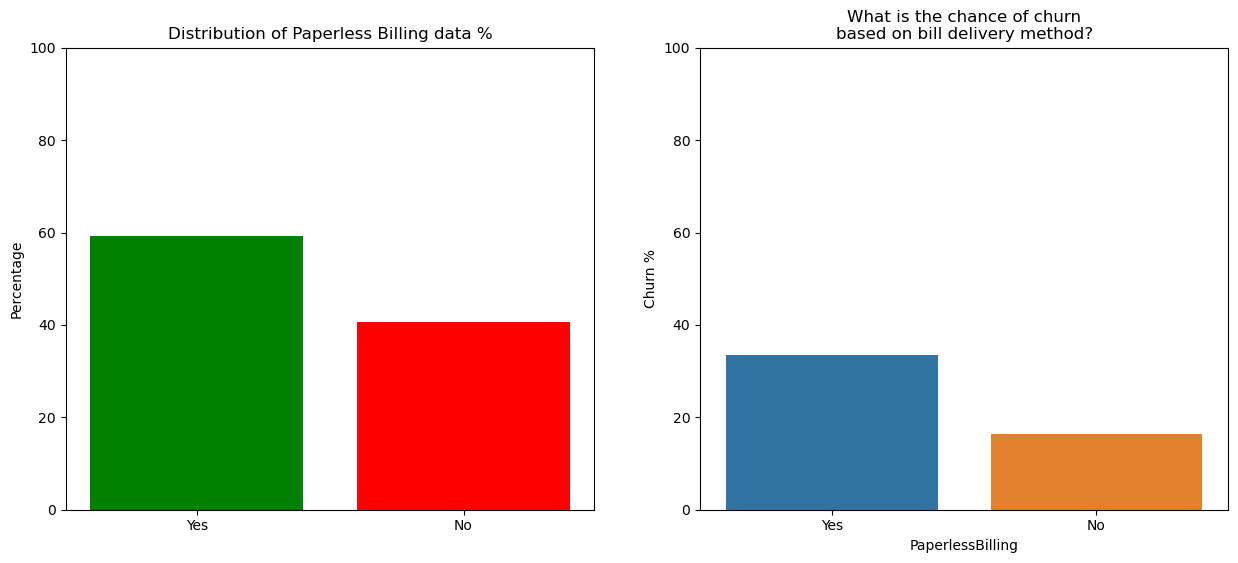

In [34]:
from textwrap import wrap
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Contract data
df3 = data["PaperlessBilling"].value_counts(normalize=True)
axes1.bar(df3.index, df3*100, color=['green', 'red'])
axes1.set_title('Distribution of Paperless Billing data %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on Contract
sns.barplot(x="PaperlessBilling", y=data.ChurnVal*100, data=data, errorbar=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on bill delivery method?', 30)))
axes2.set_ylim(0,100)

plt.show()

**Observations:**
* Almost 60% customers prefer paper-less billing.
* Almost 35% of them left the CSP.
* Now, apparently a direct relation between bill mode and churn cannot be established, it must be investigated if customers receiving soft copies of bills are getting clear and transparent information on all the charges, and proper service and care if they face any difficutly in interpreting the bills

/tmp/ipykernel_32/3425216662.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes1.set_xticklabels(df4.index, rotation=30)


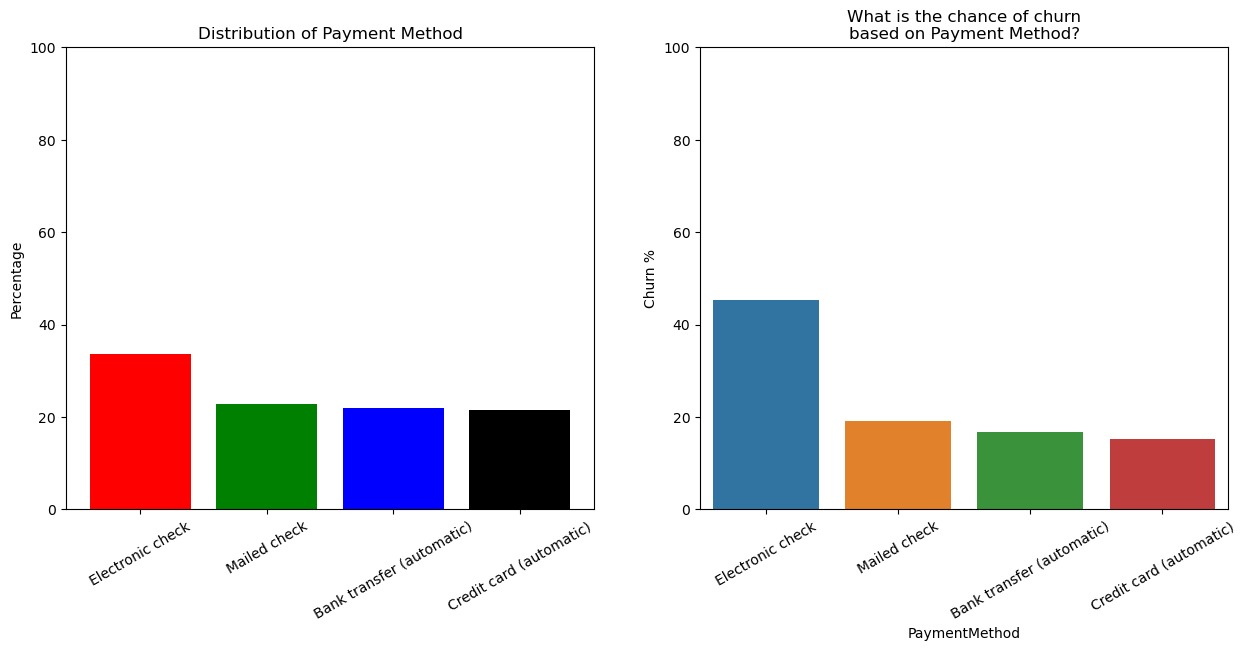

In [35]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Contract data
df4 = data["PaymentMethod"].value_counts(normalize=True)
axes1.bar(df4.index, df4*100, color=['r', 'g','b','k','y'])
axes1.set_title('Distribution of Payment Method')
axes1.set_ylabel('Percentage')
axes1.set_xticklabels(df4.index, rotation=30)
axes1.set_ylim(0,100)

# Chances of churn based on Contract
sns.barplot(x="PaymentMethod", y=data.ChurnVal*100, data=data, errorbar=None, ax=axes2)
axes2.set_ylabel('Churn %')
[items.set_rotation(30) for items in axes2.get_xticklabels()]
axes2.set_title("\n".join(wrap('What is the chance of churn based on Payment Method?', 30)))
axes2.set_ylim(0,100)

plt.show()

**Observations:**
* Customers with payment method as "Electronic Check" is slightly higher than customers with other modes of payment (~35%).
* Churn among such customers is highest as well (~45%).
* Service Provider should try to encourage customers to use and also promote automated mode of payments.

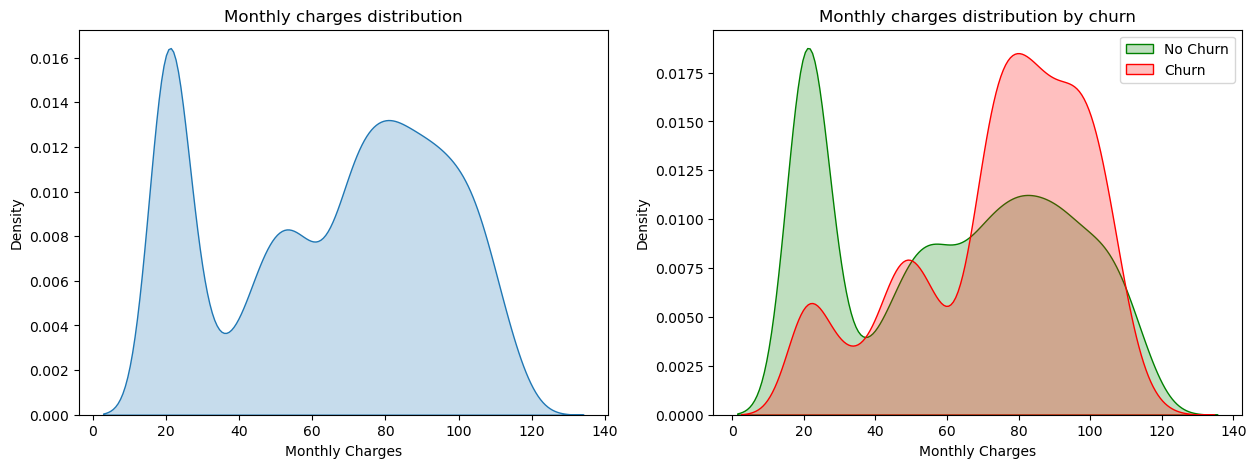

In [37]:
fig, [ax1, ax2]= plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data.MonthlyCharges, ax=ax1, fill=True)
ax1.set_ylabel('Density')
ax1.set_xlabel('Monthly Charges')
ax1.set_title('Monthly charges distribution')

sns.kdeplot(data['MonthlyCharges'][data.ChurnVal==0], ax=ax2, color='green', fill=True)
sns.kdeplot(data['MonthlyCharges'][data.ChurnVal==1], ax=ax2, color='red', fill=True)
ax2.legend(["No Churn","Churn"],loc='upper right')
ax2.set_ylabel('Density')
ax2.set_xlabel('Monthly Charges')
ax2.set_title('Monthly charges distribution by churn')
plt.show()

**Observations:**
* A huge number of customers use very cheap plan. Interstingly, churn rate among them is least as well.
* The observed churn rate is very high among high spender customers.

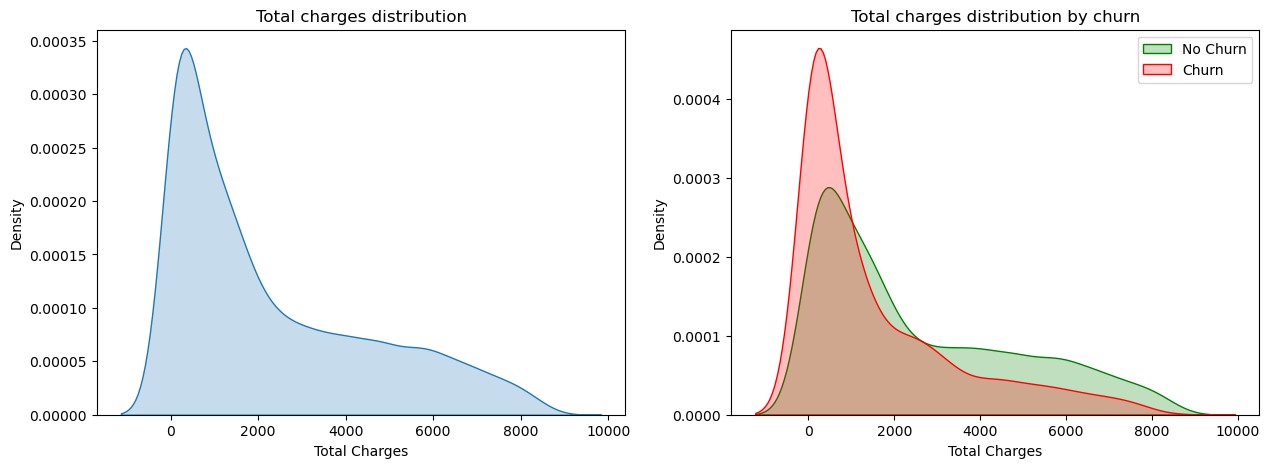

In [38]:
fig, [ax1, ax2]= plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data.TotalCharges, ax=ax1, fill=True)
ax1.set_ylabel('Density')
ax1.set_xlabel('Total Charges')
ax1.set_title('Total charges distribution')

sns.kdeplot(data['TotalCharges'][data.ChurnVal==0], ax=ax2, color='green', fill=True)
sns.kdeplot(data['TotalCharges'][data.ChurnVal==1], ax=ax2, color='red', fill=True)
ax2.legend(["No Churn","Churn"],loc='upper right')
ax2.set_ylabel('Density')
ax2.set_xlabel('Total Charges')
ax2.set_title('Total charges distribution by churn')
plt.show()

**Observations:**
* As expected, majority of customers have lower total charges.
* Highest churn rate is observed among such customers.